# Biodiversity Porfolio Project

### Main goal of the Project
Cleaning and analyzing the data to find answers for following questions:
+ Which National Park has the largest number of living organisms?
+ Is there a significant relationship between the abundance of a species and its status?
+ Are certain types of species more likely to be endangered?

### Data
This Project will use two CSV files:
+ species_info.csv - contains data about different species and their conservation status
+ observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.

In [61]:
# Importing needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

### Exploring the data

#### Species

In [62]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [63]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [64]:
species.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [65]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [120]:
species.duplicated('scientific_name').sum()

283

In [123]:
species[species.duplicated('scientific_name')]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [124]:
species[species.scientific_name == 'Cervus elaphus']

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN


In [128]:
species.drop_duplicates('scientific_name', inplace=True)

In [129]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

#### Observations

In [130]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [131]:
observations.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [132]:
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [133]:
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [134]:
observations.duplicated().sum()

15

In [135]:
observations[observations.duplicated()].scientific_name

7263     Echinochloa crus-galli
8710      Streptopelia decaocto
10038            Plantago major
10674             Arctium minus
12381      Eleocharis palustris
13372       Hesperis matronalis
16741         Prunella vulgaris
17378      Potentilla norvegica
17577        Spilogale putorius
18141             Poa compressa
19392         Cichorium intybus
20294    Botrychium virginianum
20820      Monotropa hypopithys
21151       Trifolium campestre
22698              Salix exigua
Name: scientific_name, dtype: object

In [136]:
observations[observations.scientific_name == 'Echinochloa crus-galli']

,scientific_name,park_name,observations
443,Echinochloa crus-galli,Yosemite National Park,159
802,Echinochloa crus-galli,Bryce National Park,112
1454,Echinochloa crus-galli,Great Smoky Mountains National Park,62
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
11435,Echinochloa crus-galli,Bryce National Park,116
11688,Echinochloa crus-galli,Yellowstone National Park,254
17581,Echinochloa crus-galli,Yellowstone National Park,235
17639,Echinochloa crus-galli,Yosemite National Park,172


### Cleaning the data

First, I will choose only the maximum values for each species for every park in the observations table.
Then, I will combine it with the species table and fill in the missing values in 'conservation_status' column.

In [137]:
observations_max = observations.groupby(['scientific_name', 'park_name'])['observations'].max().to_frame().reset_index()
observations_max[observations_max.scientific_name == 'Echinochloa crus-galli']

,scientific_name,park_name,observations
7108,Echinochloa crus-galli,Bryce National Park,116
7109,Echinochloa crus-galli,Great Smoky Mountains National Park,62
7110,Echinochloa crus-galli,Yellowstone National Park,254
7111,Echinochloa crus-galli,Yosemite National Park,172


In [142]:
combined = observations_max.merge(species, on='scientific_name')
combined.isnull().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    21452
dtype: int64

In [148]:
combined.fillna(value='Unclassified', inplace=True)

### Analyzing the data

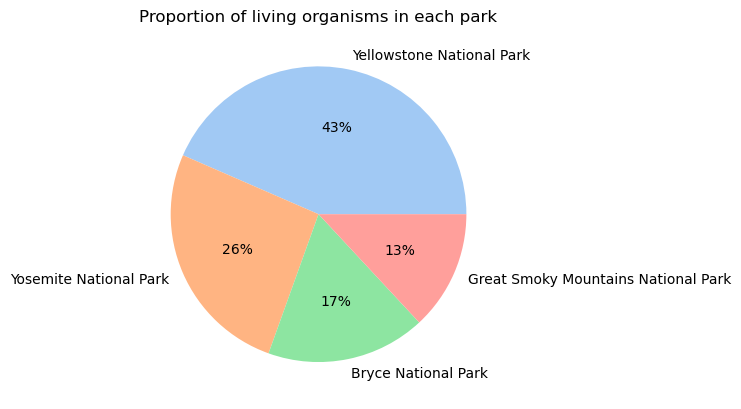

<Figure size 640x480 with 0 Axes>

In [181]:
# Which park has the highest proportion of living organisms

park = combined.groupby('park_name').observations.sum().sort_values(ascending=False).to_frame().reset_index()
data = park.observations
labels = park.park_name
colors = sns.color_palette('pastel')[0:4]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Proportion of living organisms in each park')
plt.show()
plt.clf()

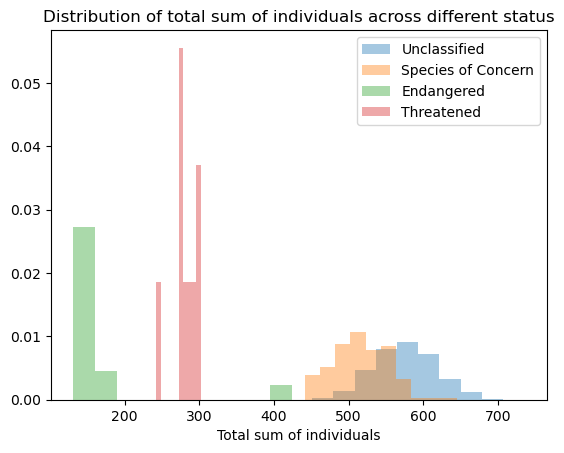

In [280]:
plt.hist(combined[combined.conservation_status == "Unclassified"].groupby('scientific_name').observations.sum(), density=True, alpha=0.4, bins=10)
plt.hist(combined[combined.conservation_status == "Species of Concern"].groupby('scientific_name').observations.sum(), density=True, alpha=0.4, bins=10)
plt.hist(combined[combined.conservation_status == "Endangered"].groupby('scientific_name').observations.sum(), density=True, alpha=0.4, bins=10)
plt.hist(combined[combined.conservation_status == "Threatened"].groupby('scientific_name').observations.sum(), density=True, alpha=0.4, bins=10)
plt.legend(["Unclassified", "Species of Concern", "Endangered", "Threatened"])
plt.xlabel("Total sum of individuals")
plt.title("Distribution of total sum of individuals across different status")
plt.show()

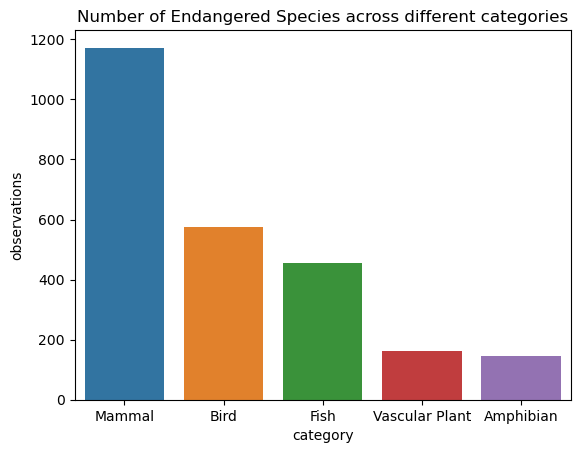

<Figure size 640x480 with 0 Axes>

In [342]:
endangered = combined[combined.conservation_status == 'Endangered'].groupby("category").observations.sum().reset_index().sort_values(by='observations', ascending=False)

sns.barplot(x = endangered.category, y = endangered.observations)
plt.title('Number of Endangered Species across different categories')
plt.show()
plt.clf()

### Conclusions
##### Which National Park has the largest number of living organisms?
Almost half of all organisms (43%) in the data live in Yellowstone National Park.
##### Is there a significant relationship between the abundance of a species and its status?
Yes, there is a strong relationship between the abundance of a species and its status. Almost all species with "endangered" status count for less than 200 individuals, which is the worst result.
##### Are certain types of species more likely to be endangered?
Mammals seem to be the most likely to be endangered with almost 2 times more endangered species than the second category (birds).